In [96]:
!pip install tqdm

In [97]:
!pip install notebook wordcloud pillow numpy bs4 tqdm
!pip install wordcloud
#python -m pip install wordcloud
from wordcloud import WordCloud

In [98]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import requests

In [99]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [114]:
url_base = 'http://www.mldb.org'
artista = 'artist-470-radiohead.html'
req = requests.get(f'{url_base}/{artista}', headers={'User-Agent': 'Mozilla/5.0'})

In [115]:
pagina = req.text

pagina

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n<title>MLDb, The Music Lyrics Database - List of songs of Foreigner by albums</title>\n<meta name="Author" content="Nikolay Pelov, NickSoft" />\n<meta name="Description" content="List of songs of Foreigner by albums" />\n<meta name="Keywords" content="music,song,lyrics,mldb,artist,group,performer,Foreigner,4,Agent Provocateur,Double Vision,Foreigner,Head Games,Inside Information,Mr Moonlight,Unusual Heat" />\n<meta name="robots" content="index,follow" />\n<meta name="revisit-after" content="7 days" />\n<meta name="title" content="MLDb, The Music Lyrics Database - List of songs of Foreigner by albums" />\n<meta name="distribution" content="Global" />\n<meta name="rating" content="general" />\n<link href="style.css" media="all" type="text/css" rel="stylesheet" />\n<link href="/favicon.ico" 

In [116]:
sopao_ht = BeautifulSoup(pagina, 'html.parser')

sopao_ht

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>MLDb, The Music Lyrics Database - List of songs of Foreigner by albums</title>
<meta content="Nikolay Pelov, NickSoft" name="Author"/>
<meta content="List of songs of Foreigner by albums" name="Description"/>
<meta content="music,song,lyrics,mldb,artist,group,performer,Foreigner,4,Agent Provocateur,Double Vision,Foreigner,Head Games,Inside Information,Mr Moonlight,Unusual Heat" name="Keywords"/>
<meta content="index,follow" name="robots"/>
<meta content="7 days" name="revisit-after"/>
<meta content="MLDb, The Music Lyrics Database - List of songs of Foreigner by albums" name="title"/>
<meta content="Global" name="distribution"/>
<meta content="general" name="rating"/>
<link href="style.css" media="all" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico" rel="shortcut icon"/>


In [117]:
# Extraindo links das músicas
links_musicas = sopao_ht.find_all('a', {'href': re.compile(r'song-*')} )

len(links_musicas)

80

In [118]:
links_musicas[20]

<a href="song-11210-back-where-you-belong.html">Back Where You Belong</a>

In [119]:
from tqdm import tqdm

letras_radiohead = ''

with open('./lyrics_radiohead.txt', 'w') as arquivo_letras:
    for link_musica in tqdm(links_musicas):
        url_musica = link_musica['href']
        url_completa = f'{url_base}/{url_musica}'

        req = requests.get(url_completa, headers={'User-Agent': 'Mozilla/5.0'})

        sopao_musica = BeautifulSoup(req.text, 'html.parser')

        letra = sopao_musica.find('p', {'class': 'songtext'} )
        
        arquivo_letras.write(f'{letra.text}\n')
        
        letras_radiohead += f'{letra.text}\n'

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:44<00:00,  1.80it/s]


In [120]:
letras_radiohead[100:150]

"t want to face life\nFeel I've been betrayed\nI want"

In [121]:
# Organizar numa lista de palavras
tokens = letras_radiohead.split()

In [122]:
# Organizar numa lista de palavras
tokens = letras_radiohead.split()

In [123]:
tokens[:10]

['Made',
 'myself',
 'a',
 'prisoner',
 'I',
 'locked',
 'myself',
 'away',
 "Can't",
 'remember']

In [124]:
# Preparando para wordcloud: uma STRINGZONA só com todas as palavras
palavras_radiohead = " ".join(tokens)

palavras_radiohead[:100]

"Made myself a prisoner I locked myself away Can't remember the last time I saw the light of day Don'"

In [131]:
wordcloud = WordCloud(background_color = 'white',
                #stopwords = stopwords_customizada,
                #contour_width = 1,
                #contour_color  = 'white',
                #colormap='Purples',
                random_state=42).generate(palavras_radiohead)

In [132]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

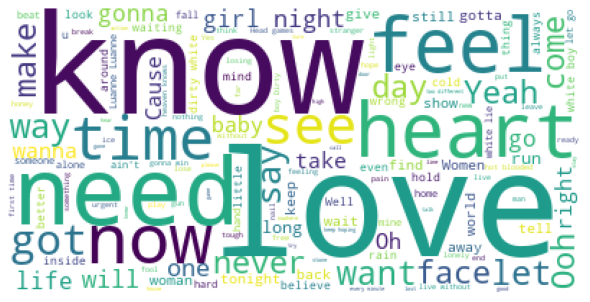

In [133]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()